<a href="https://colab.research.google.com/github/KIM-CHAEYOUNG/QGIS/blob/master/Open_GEOJSON_with_GEOPANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geopandas로 geojson 파일 열어보기

- Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc). Loading most of Geodata Formats with Geopandas is straightforward. We can use:

- read_file(path/to/file)

***GEOPANDAS***

- read 'vector-based' spatial data format
- PANDAS ~> 지리학에 적용

    1. the basic classes of geometric objects

        points(점) - Multi-Points
        Lines (선) - Multi-Lines
        Polygons (면) - Multi_Polygons

2. GeoDataFrame
    1) always one GeoSeries column
    2)) GeoSeries -> 'geometry" -> spatial(공간) / area 
    ->영역/공간값 확인은 'geometry'

In [1]:
# 패키지 설치

%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-

In [2]:
# 패키지 불러오기

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import plotly_express as px

## 드라이브 마운트

In [3]:
from google.colab import drive

ROOT = "/content/drive"   
print(ROOT)       
drive.mount(ROOT)

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [7]:
%cd drive/'My Drive'/'고양시'/

/content/drive/My Drive/고양시


In [8]:
%ls

'미래 영향요인 조사'/
 화성시/
 분석완료/
 01.운영이력.csv
 02.자전거스테이션.csv
 03.꽃박람회일정.csv
 03_map/
 03_map.zip
 04.KINTEX행사일정.csv
 05.기상정보.csv
'06.인구(거주)분포도(100M_X_100M).geojson'
 07.인구통계.csv
'08.행정경계(시군구).geojson'
'09.행정경계(읍면동).geojson'
 아이디어1/
'10.도시계획(공간시설).geojson'
'11.도시계획(공공문화체육시설).geojson'
'12.도시계획(교통시설).geojson'
'13.용도지역지구(습지보호지역).geojson'
 14.고양시_지적도.geojson
 15.도로명주소_건물.geojson
 16.도로명주소_도로.geojson
'17.일반건물_분포도(100M_X_100M).geojson'
 18.행사장_공간정보.csv
 19.전철역_공간정보.csv
 아이디어2/
 20.고양시_버스정류소.csv
 20.고양시_버스정류소.csv.20.고양시_버스정류소.vrt
 21.버스_정류장별_승하차_정보.csv
 22.주차장정보.csv
 23.고양시덕양구_DEM.img
 24.고양시일산동구_DEM.img
 25.고양시일산서구_DEM.img
'26.고양시 공연장 박물관 정보.csv'
'27.고양시 체육시설 현

## 대망의 geojson 파일 열어보기

In [9]:
pop_distribution = gpd.read_file('/content/drive/My Drive/고양시/06.인구(거주)분포도(100M_X_100M).geojson')
pop_distribution

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


In [10]:
pop_distribution.geom_type[:5] # multipolygon --> 여러 좌표를 이은 선 내부의 범위

0    MultiPolygon
1    MultiPolygon
2    MultiPolygon
3    MultiPolygon
4    MultiPolygon
dtype: object

In [11]:
pop_distribution.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27350 entries, 0 to 27349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       27350 non-null  object  
 1   val       9241 non-null   float64 
 2   geometry  27350 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 641.1+ KB


In [ ]:
print(pop_distribution.geometry[113])

MULTIPOLYGON (((126.6755550866537 37.67805296358832, 126.6755451127489 37.67895420937488, 126.6766790559897 37.6789621312533, 126.6766890161803 37.67806088521081, 126.6755550866537 37.67805296358832)))


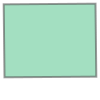

In [ ]:
pop_distribution.geometry[113]

In [ ]:
pop_distribution.loc[pop_distribution['gid'].str.contains('다사', na=False)]

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


## 아니면 fiona로 열어도 된다고 함

In [12]:
import fiona # shape file, geojson 모두 지원합니다. 
f = fiona.open('/content/drive/My Drive/고양시/06.인구(거주)분포도(100M_X_100M).geojson') 
f

<open Collection '/content/drive/My Drive/고양시/06.인구(거주)분포도(100M_X_100M).geojson:고양시 총인구 수 (100MX100M)_수정', mode 'r' at 0x7fce61dfe080>

In [14]:
f[23300]

{'geometry': {'coordinates': [[[(126.90804053986125, 37.676745073089194),
     (126.90803337871928, 37.67764636440103),
     (126.90916735901932, 37.67765205077654),
     (126.90917450644528, 37.67675075928099),
     (126.90804053986125, 37.676745073089194)]]],
  'type': 'MultiPolygon'},
 'id': '23300',
 'properties': OrderedDict([('gid', '다사478643'), ('val', 6.0)]),
 'type': 'Feature'}

In [15]:
with fiona.open('/content/drive/My Drive/고양시/06.인구(거주)분포도(100M_X_100M).geojson') as f: 
  item_list = [item for item in f]

item_list

[{'geometry': {'coordinates': [[[(126.66984527311281, 37.68161816913053),
      (126.66983522884719, 37.682519413070544),
      (126.67096922472193, 37.682527390484694),
      (126.67097925527102, 37.681626146286895),
      (126.66984527311281, 37.68161816913053)]]],
   'type': 'MultiPolygon'},
  'id': '0',
  'properties': OrderedDict([('gid', '다사268650'), ('val', None)]),
  'type': 'Feature'},
 {'geometry': {'coordinates': [[[(126.66983522884719, 37.682519413070544),
      (126.66982518413394, 37.68342065687018),
      (126.67095919372584, 37.683428634542096),
      (126.67096922472193, 37.682527390484694),
      (126.66983522884719, 37.682519413070544)]]],
   'type': 'MultiPolygon'},
  'id': '1',
  'properties': OrderedDict([('gid', '다사268651'), ('val', None)]),
  'type': 'Feature'},
 {'geometry': {'coordinates': [[[(126.66982518413394, 37.68342065687018),
      (126.66981513897305, 37.684321900529476),
      (126.67094916228268, 37.68432987845913),
      (126.67095919372584, 37.6834

In [16]:
pop_distribution.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27350 entries, 0 to 27349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gid       27350 non-null  object  
 1   val       9241 non-null   float64 
 2   geometry  27350 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 641.1+ KB


In [21]:
pop_distribution.groupby(['gid','val']).count() # val 값이 있는 것이 9241개

,,geometry
gid,val,
다사277649,0.0,1
다사277652,8.0,1
다사277653,11.0,1
다사277656,0.0,1
다사278651,13.0,1
...,...,...
다사536607,0.0,1
다사538597,0.0,1
다사538608,0.0,1


In [22]:
pop_distribution_val = pop_distribution.groupby(['gid','val']).sum() # val 값을 가진 것들만 추출

pop_distribution_val2 = pop_distribution_val.reset_index()
pop_distribution_val2

,gid,val,geometry
0,다사277649,0.0,"(POLYGON ((126.6800610489505 37.6807883246783,..."
1,다사277652,8.0,(POLYGON ((126.6800312865019 37.68349206341949...
2,다사277653,11.0,(POLYGON ((126.6800213648016 37.68439330938592...
3,다사277656,0.0,(POLYGON ((126.6799915970475 37.68709704644339...
4,다사278651,13.0,(POLYGON ((126.6811752076359 37.68259869660541...
...,...,...,...
9236,다사536607,0.0,(POLYGON ((126.9740400816905 37.64460990861157...
9237,다사538597,0.0,(POLYGON ((126.9763703276994 37.63560691889907...
9238,다사538608,0.0,"(POLYGON ((126.9763007352722 37.6455213004185,..."
9239,다사539608,0.0,(POLYGON ((126.9774342401782 37.64552632679178...


In [23]:
pop_distribution_val.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9241 entries, ('다사277649', 0.0) to ('다사542608', 0.0)
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   geometry  9241 non-null   object
dtypes: object(1)
memory usage: 328.7+ KB


In [24]:
pop_distribution_val2.info() # pandas dataframe으로 바뀜 (아마 groupby하는 과정에서 그런가봄. 원인은 추후에 update...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9241 entries, 0 to 9240
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gid       9241 non-null   object 
 1   val       9241 non-null   float64
 2   geometry  9241 non-null   object 
dtypes: float64(1), object(2)
memory usage: 216.7+ KB


In [ ]:
pop_distribution_val2.to_csv('pop_distribution_val2.csv')

In [26]:
# 뽑아낸 데이터와 매핑할 다른 데이터가 필요
eupmyundong = gpd.read_file('/content/drive/My Drive/고양시/09.행정경계(읍면동).geojson')
eupmyundong

,EMD_CD,EMD_KOR_NM,geometry
0,41281101,주교동,"MULTIPOLYGON (((126.81068 37.65820, 126.81069 ..."
1,41281102,원당동,"MULTIPOLYGON (((126.83321 37.68013, 126.83340 ..."
2,41281103,신원동,"MULTIPOLYGON (((126.86362 37.67729, 126.86364 ..."
3,41281104,원흥동,"MULTIPOLYGON (((126.85975 37.65081, 126.85990 ..."
4,41281105,도내동,"MULTIPOLYGON (((126.84806 37.62348, 126.84835 ..."
5,41281106,성사동,"MULTIPOLYGON (((126.83047 37.64860, 126.83053 ..."
6,41281107,북한동,"MULTIPOLYGON (((126.95320 37.65582, 126.95334 ..."
7,41281108,효자동,"MULTIPOLYGON (((126.94756 37.65922, 126.94777 ..."
8,41281109,지축동,"MULTIPOLYGON (((126.89619 37.65389, 126.89627 ..."
9,41281110,오금동,"MULTIPOLYGON (((126.89197 37.67066, 126.89222 ..."


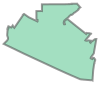

In [27]:
eupmyundong['geometry'].iloc[52]

34_고양시행정경계(행정동기준)
- 행정동 코드
- 행정동명
- geometry

In [29]:
hangjeongdong = gpd.read_file('/content/drive/My Drive/고양시/34.고양시_행정경계(행정동기준).geojson')
hangjeongdong

,행정동코드,행정동명,geometry
0,3110151,주교동,"MULTIPOLYGON (((126.83514 37.67683, 126.83517 ..."
1,3110152,원신동,"MULTIPOLYGON (((126.84983 37.68986, 126.84996 ..."
2,3110153,흥도동,"MULTIPOLYGON (((126.87615 37.64768, 126.87562 ..."
3,3110154,성사1동,"MULTIPOLYGON (((126.84898 37.66872, 126.84915 ..."
4,3110155,성사2동,"MULTIPOLYGON (((126.83502 37.65491, 126.83527 ..."
5,3110156,효자동,"MULTIPOLYGON (((126.95736 37.69195, 126.95790 ..."
6,3110170,삼송동,"MULTIPOLYGON (((126.90630 37.67545, 126.90630 ..."
7,3110158,창릉동,"MULTIPOLYGON (((126.90072 37.65079, 126.90124 ..."
8,3110159,고양동,"MULTIPOLYGON (((126.92910 37.74849, 126.92964 ..."
9,3110160,관산동,"MULTIPOLYGON (((126.85891 37.73417, 126.85881 ..."


35_고양시_도시화지역경계
- SIGUNGU_CD  - 해당지역 시군구코드
- UA_CD - 해당지역 도시화지역코드
- UA_NM_ 해당지역 도시화지역명
- INGU_CNT-해당지역 인구
- UA_AREA - 해당지역 도시지목면적
- BAS_CNT - 기초단위구수

In [31]:
city_bound = gpd.read_file('/content/drive/My Drive/고양시/35.고양시_도시화지역경계.geojson')
city_bound 

,SIGUNGU_CD,UA_CD,UA_NM,INGU_CNT,UA_AREA,BAS_CNT,geometry
0,31101,UA311011,도시화지역 1,200330.0,5493213.78,1105,"MULTIPOLYGON (((126.83119 37.64876, 126.83131 ..."
1,31101,UA311012,도시화지역 10,3553.0,308050.11,17,"MULTIPOLYGON (((126.87061 37.60478, 126.87064 ..."
2,31101,UA311013,도시화지역 2,64906.0,2906659.22,381,"MULTIPOLYGON (((126.87958 37.64411, 126.87942 ..."
3,31101,UA311014,도시화지역 3,47864.0,1347246.48,338,"MULTIPOLYGON (((126.83641 37.66600, 126.83655 ..."
4,31101,UA311015,도시화지역 4,21652.0,734702.03,107,"MULTIPOLYGON (((126.89562 37.66369, 126.89570 ..."
5,31101,UA311016,도시화지역 5,20735.0,512190.96,123,"MULTIPOLYGON (((126.90673 37.71124, 126.90669 ..."
6,31101,UA311017,도시화지역 6,12266.0,362798.92,82,"MULTIPOLYGON (((126.86483 37.69379, 126.86505 ..."
7,31101,UA311018,도시화지역 7,10318.0,628378.85,58,"MULTIPOLYGON (((126.85891 37.71724, 126.85898 ..."
8,31101,UA311019,도시화지역 8,7770.0,414097.95,29,"MULTIPOLYGON (((126.84777 37.73355, 126.84729 ..."
9,31101,UA3110110,도시화지역 9,4288.0,130148.22,39,"MULTIPOLYGON (((126.90758 37.72327, 126.90771 ..."


# GEOJSON을 파이썬에서 여는 방법
- GEOPANDAS를 통해 열 것
- geometry 속 multipolygon은 공간 면적
- 공간 데이터에서 관건은 'geometry'

In [ ]:
m = folium.Map(location=[37.34, 126.565], tiles="OpenStreetMap", zoom_start=10)
m